In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc
from SnBDM import *
#rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
rc('text', usetex=True)
matplotlib.rcParams['axes.linewidth'] = 1.2 #set the value globally

In [2]:
dsnb_flux = interpolate_nu_flux('DSNB_flux.csv')
# XENON detector properties: Z=40, m_Xe=2.1801714*10^-25 kg, energy resolution = a*E^1/2 + b*E keV (from arXiv:2006.09721)
xenon = [40., 2.1801714e-25, 0.31*10.**-1.5, 0.0037]
B0 = np.loadtxt('XENON/B0_1to30keV.txt', delimiter=',', unpack=True, encoding='utf8')
B0_interp = interp1d(B0[0],B0[1], kind='linear')
binned_data = np.loadtxt('XENON/data_binned_1to30kev.txt', delimiter=',', unpack=True, encoding='utf8')
erlist = np.logspace(np.log10(B0[0][0]),np.log10(B0[0][-2]),num=20)
efficiency = np.loadtxt('XENON/efficiency.txt', delimiter=',', unpack=True, encoding='utf8')
efficiency_interp = interp1d(efficiency[0], efficiency[3], kind='linear')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


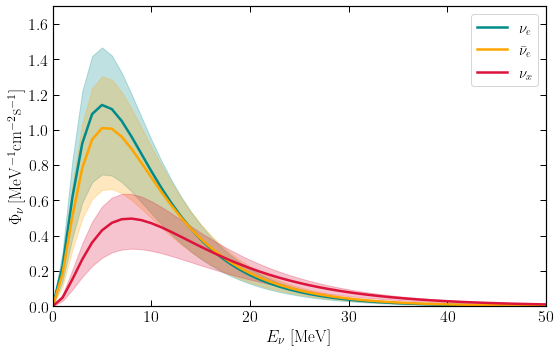

In [5]:
make_DSNB_plot([['NueC.dat', 'NueL.dat', 'NueU.dat'],['NuebarC.dat', 'NuebarL.dat', 'NuebarU.dat'],['NuxC.dat', 'NuxL.dat', 'NuxU.dat']], [r'$\nu_e$',r'$\bar{\nu}_e$',r'$\nu_x$'], ['darkcyan','orange','crimson'])

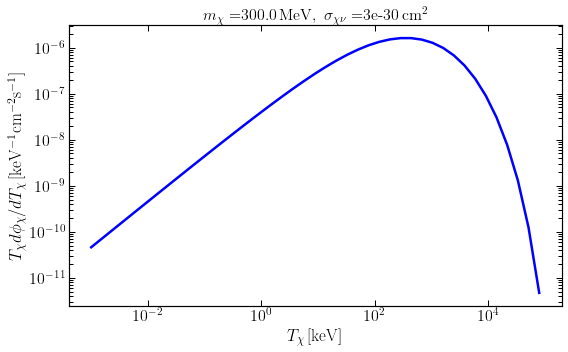

In [3]:
make_BDM_flux_plot(300., 3.e-30)

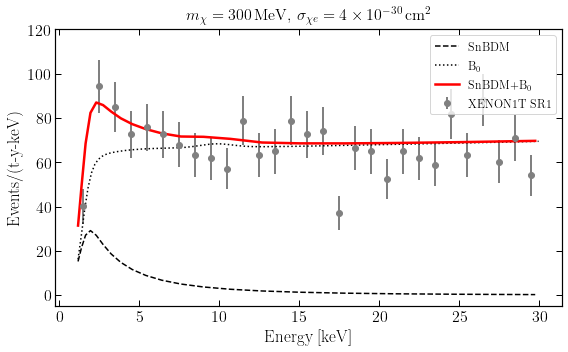

In [4]:
make_recoil_plot(300., 4.e-30, erlist, dsnb_flux, xenon,binned_data, B0, B0_interp, efficiency_interp, r'$m_\chi= 300\,$MeV, $\sigma_{\chi e}= 4\times 10^{-30}\,\mathrm{cm^2}$')